In [1]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv("C:/Users/rahul/Desktop/Group Project/Repo/MyUniLifeSimulation/SRC/Recommender System src/Recommender System Backup/recommender_system_data.csv",encoding='cp1252')
df.head()

,University,Course_Name,CAO Score,Budget,City,Interest,Job domain
0,University College Dublin,Biomedical Engineering (DN150),556,6000,Dublin,Cricket,IT
1,University College Dublin,Chem & Bioprocess Engineering (NQS2),528,5000,Dublin,Football,HR
2,University College Dublin,Civil Engineering (DN150),551,4500,Dublin,Singing,Management
3,University College Dublin,Computer Science (DN201),542,3500,Dublin,Chess,Support
4,University College Dublin,Electrical/Electronics Engineering (DN150),555,6500,Dublin,Athletics,Finance


In [12]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

In [13]:
df.mean()

CAO Score     361.998336
Budget       4862.945092
dtype: float64

### Geometric Mean

In [14]:
from scipy.stats import gmean
print ("Geometric mean of CAO Points: ",gmean(df['CAO Score']))
print ("Geometric mean of Tuition Fee ",gmean(df['Budget']))

Geometric mean of CAO Points:  340.95918130343716
Geometric mean of Tuition Fee  4522.3187876987795


### Harmonic Mean

In [15]:
print ("Harmonic mean of CAO Points: ",statistics.harmonic_mean(df['CAO Score']))
print ("Harmonic mean of Tuition Fee ",statistics.harmonic_mean(df['Budget']))

Harmonic mean of CAO Points:  316.38335828506064
Harmonic mean of Tuition Fee  4182.181041438962


### Mode

In [16]:
df.mode()

,University,Course_Name,CAO Score,Budget,City,Interest,Job domain
0,Technological University of the Shannon,Bachelor of Business (allowing later specialis...,450.0,5000.0,Athlone,Cricket,Support
1,NaN,Bachelor of Engineering (Honours) Agricultural...,NaN,NaN,NaN,NaN,NaN
2,NaN,Bachelor of Engineering Agricultural Systems E...,NaN,NaN,NaN,NaN,NaN


### Median

In [17]:
print ("Median of CAO Points: ",statistics.median(df['CAO Score']))
print ("Median of Tuition Fee ",statistics.median(df['Budget']))

Median of CAO Points:  350.0
Median of Tuition Fee  4500.0


### Standard Deviation

In [18]:
print ("Standard Deviation of CAO Points: ",statistics.stdev(df['CAO Score']))
print ("Standard Deviation of Tuition Fee ",statistics.stdev(df['Budget']))

Standard Deviation of CAO Points:  117.69636689311857
Standard Deviation of Tuition Fee  1800.139879079678


### Variance

In [19]:
print ("Variance of CAO Points: ",statistics.variance(df['CAO Score']))
print ("Variance of Tuition Fee ",statistics.variance(df['Budget']))

Variance of CAO Points:  13852.434779839577
Variance of Tuition Fee  3240503.584252998


### Skewness

In [20]:
df.skew()

CAO Score    0.258519
Budget       0.384866
dtype: float64

### Illustration of skewness

<AxesSubplot: ylabel='Density'>

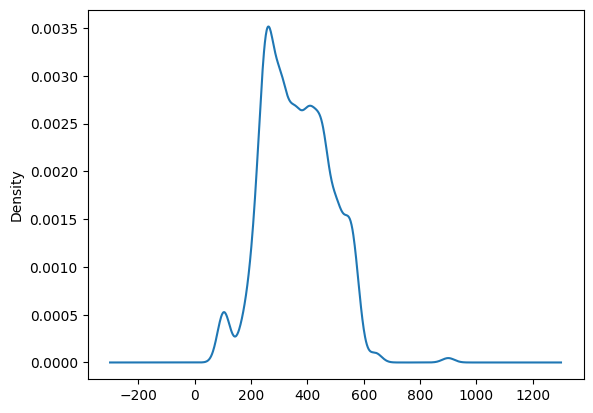

In [21]:
df['CAO Score'].plot(kind = 'density')

<AxesSubplot: ylabel='Density'>

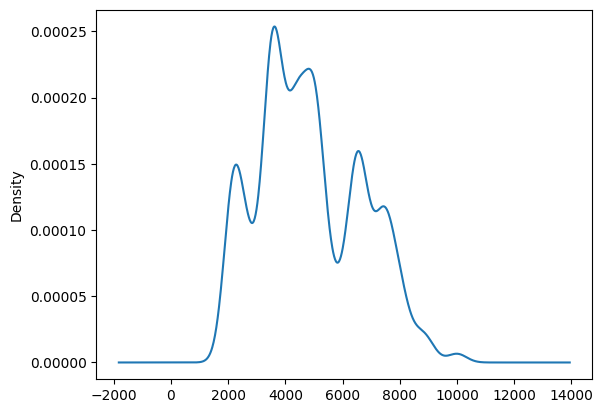

In [22]:
df['Budget'].plot(kind='density')

### Kurtosis

In [23]:
df.kurt()

CAO Score    0.248330
Budget      -0.661111
dtype: float64

<AxesSubplot: ylabel='Density'>

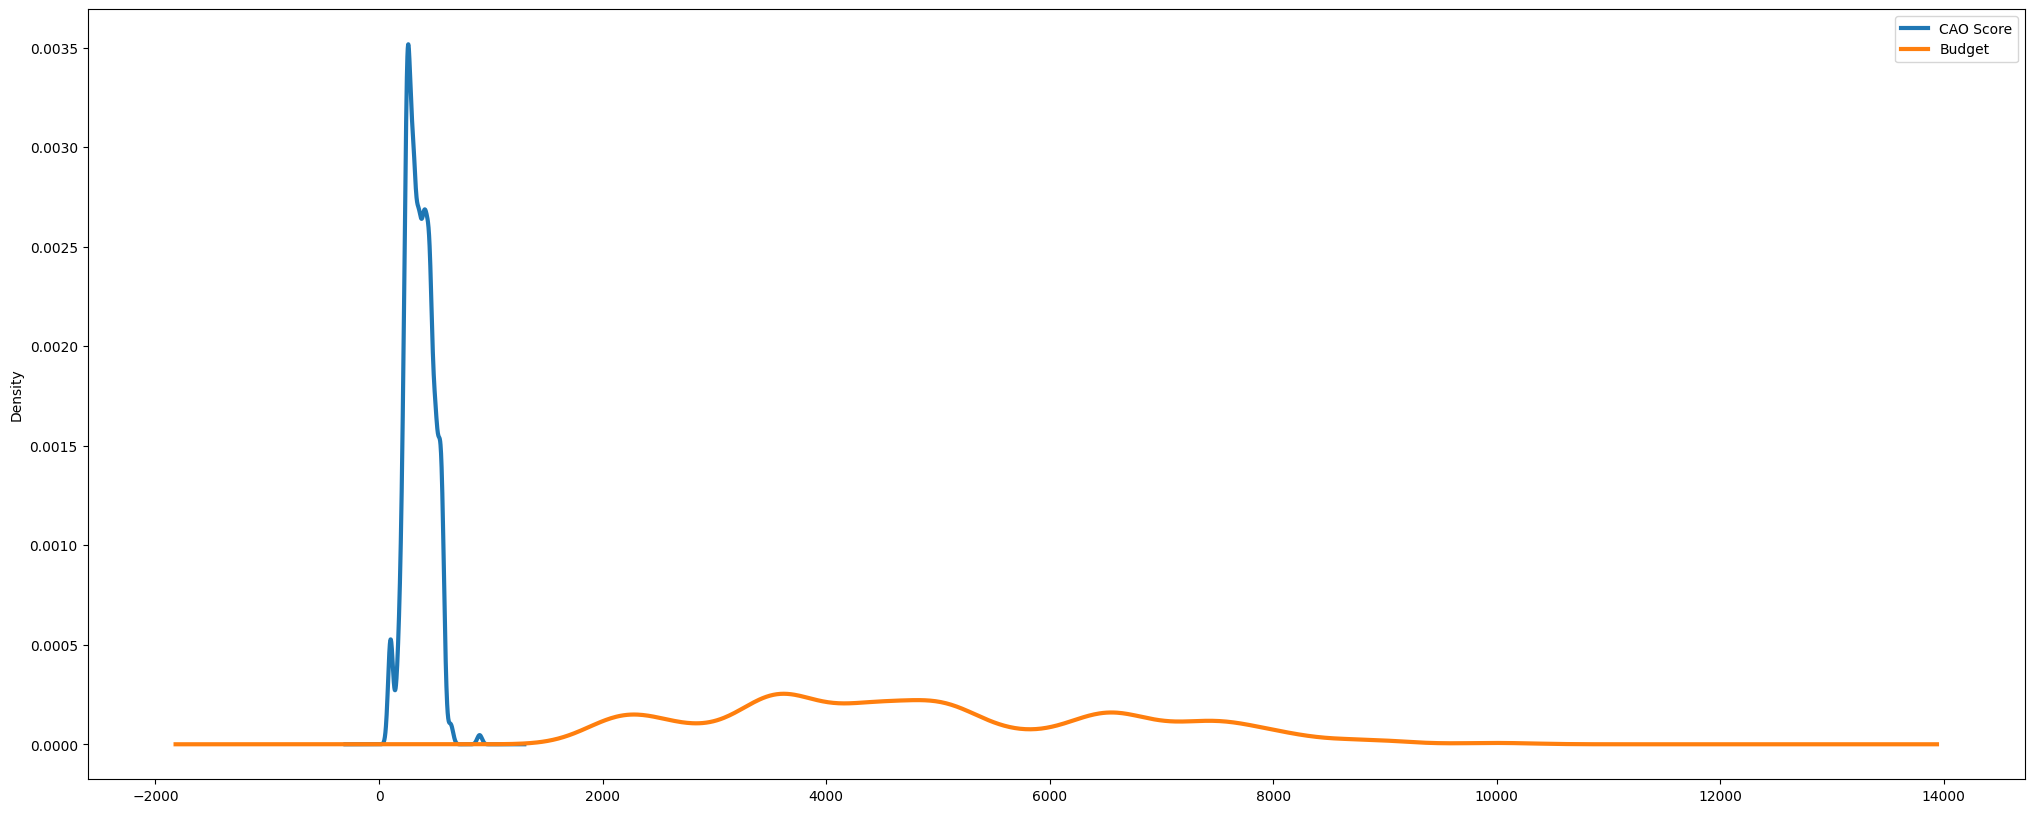

In [24]:
df.plot.density(figsize = (25, 10),linewidth = 3)

### InterQuartile Ranges

In [25]:
for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of CAO Score : 180
IQR of Budget : 3000


### Mean Absolute Deviation

In [26]:
df.mad()

CAO Score      97.031982
Budget       1491.386633
dtype: float64

### Z-Scores

In [27]:
import scipy.stats as stats
z_scores = stats.zscore(numeric_data)
z_scores

,CAO Score,Budget
0,1.648495,0.631714
1,1.410570,0.076144
2,1.606008,-0.201641
3,1.529532,-0.757212
4,1.639997,0.909499
...,...,...
4803,0.535345,-0.340534
4804,0.535345,-0.340534
4805,-0.739253,0.909499
4806,-0.739253,0.909499


### P-Value

In [28]:
p_values_1 = scipy.stats.norm.sf(abs(1.648))#left-tailed

p_values_2 = scipy.stats.norm.sf(abs(z_scores)) #right-tailed

p_values_3 = scipy.stats.norm.sf(abs(z_scores))*2 #two-tailed

p_values_1, p_values_2, p_values_3

(0.04967633559186418,
 array([[0.04962559, 0.26378696],
        [0.07918576, 0.46965242],
        [0.05413606, 0.42009851],
        ...,
        [0.22987671, 0.18154343],
        [0.22987671, 0.18154343],
        [0.22987671, 0.22446154]]),
 array([[0.09925119, 0.52757392],
        [0.15837153, 0.93930484],
        [0.10827212, 0.84019703],
        ...,
        [0.45975342, 0.36308686],
        [0.45975342, 0.36308686],
        [0.45975342, 0.44892308]]))

In [29]:
scipy.stats.norm.sf(abs(1.648))

0.04967633559186418

### One-way Anova

In [30]:
from scipy.stats import f_oneway
class1 = df['CAO Score']
class2 = df['Budget']
print(f_oneway(class1, class2))

F_onewayResult(statistic=29930.02970172198, pvalue=0.0)


### Visualisations

### Boxplots for CAO Score

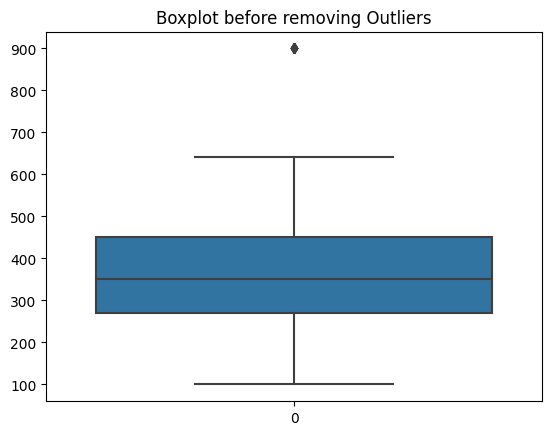

In [31]:
sns.boxplot(df['CAO Score'])
plt.title('Boxplot before removing Outliers')
plt.show()

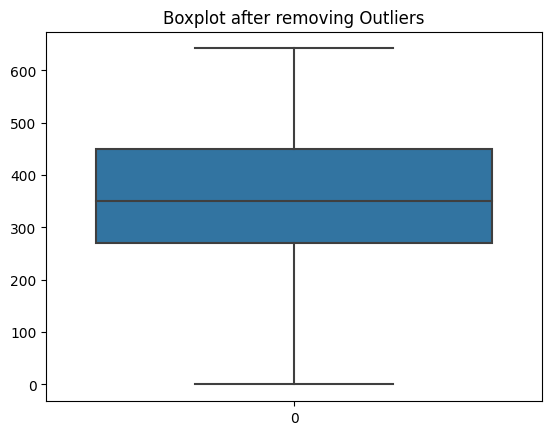

In [32]:
for i in df['CAO Score']:
    q1 = df['CAO Score'].quantile(0.25)
    q3 = df['CAO Score'].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    
    if i>upper_tail or i<lower_tail:
        df['CAO Score'] = df['CAO Score'].replace(i,0)
        
sns.boxplot(df['CAO Score'])
plt.title('Boxplot after removing Outliers')
plt.show()

### Boxplots for Budget

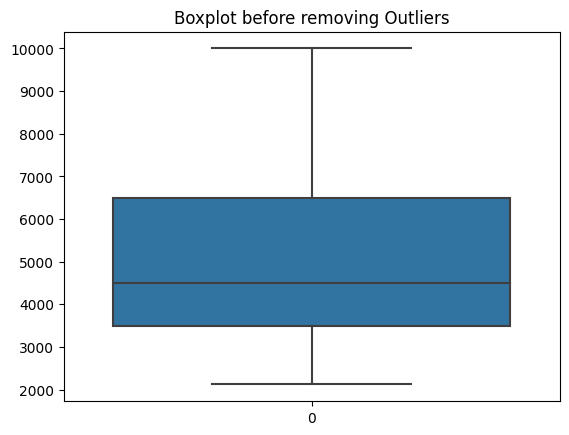

In [33]:
sns.boxplot(df['Budget'])
plt.title('Boxplot before removing Outliers')
plt.show()

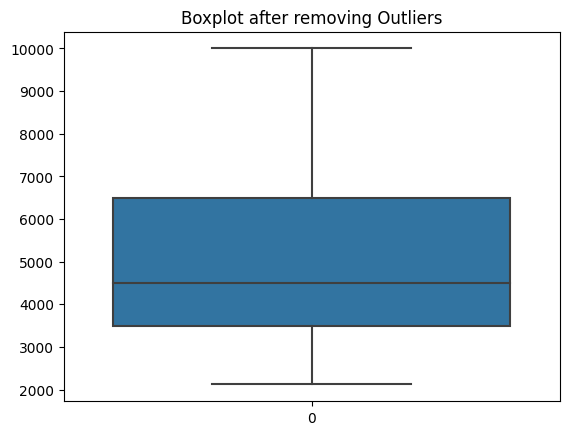

In [34]:
for i in df['Budget']:
    q1 = df['Budget'].quantile(0.25)
    q3 = df['Budget'].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    
    if i>upper_tail or i<lower_tail:
        df['Budget'] = df['Budget'].replace(i,0)
        
sns.boxplot(df['Budget'])
plt.title('Boxplot after removing Outliers')
plt.show()